In [30]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

import janitor as jn
import pandas_profiling

%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-dark-palette')
cmaps = OrderedDict()

In [31]:
path = r'C:\Users\aaron\prem_league_analytics\data\ '
df = pd.read_csv(path+'fifa-all.csv')

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
jn.clean_names(df)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [33]:
def clean_col(name):
    return (
        name.strip().lower().replace(" ", "_")
    )
df.rename(columns=clean_col)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [34]:
df = df.fillna(0)
df = df.replace({'NaN': 0}, regex=True)
df.head()

,Unnamed: 0,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.0,2014-07-16,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [35]:
df.isna().any().any()

False

In [36]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.0,2014-07-16,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [37]:
df['attacking_crossing'] = df['attacking_crossing'].astype(str)
df['attacking_finishing'] = df['attacking_finishing'].astype(str)
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].astype(str)
df['attacking_short_passing'] = df['attacking_short_passing'].astype(str)
df['attacking_volleys'] = df['attacking_volleys'].astype(str)
df['skill_dribbling'] = df['skill_dribbling'].astype(str)
df['skill_curve'] = df['skill_curve'].astype(str)
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].astype(str)
df['skill_long_passing'] = df['skill_long_passing'].astype(str)
df['skill_ball_control'] = df['skill_ball_control'].astype(str)
df['movement_acceleration'] = df['movement_acceleration'].astype(str)
df['movement_sprint_speed'] = df['movement_sprint_speed'].astype(str)
df['movement_agility'] = df['movement_agility'].astype(str)
df['movement_reactions'] = df['movement_reactions'].astype(str)
df['movement_balance'] = df['movement_balance'].astype(str)
df['power_shot_power'] = df['power_shot_power'].astype(str)
df['power_jumping'] = df['power_jumping'].astype(str)
df['power_stamina'] = df['power_stamina'].astype(str)
df['power_strength'] = df['power_strength'].astype(str)
df['power_long_shots'] = df['power_long_shots'].astype(str)
df['mentality_aggression'] = df['mentality_aggression'].astype(str)
df['mentality_interceptions'] = df['mentality_interceptions'].astype(str)
df['mentality_positioning'] = df['mentality_positioning'].astype(str)
df['mentality_vision'] = df['mentality_vision'].astype(str)
df['mentality_penalties'] = df['mentality_penalties'].astype(str)
df['mentality_composure'] = df['mentality_composure'].astype(str)
df['defending_marking'] = df['defending_marking'].astype(str)
df['defending_standing_tackle'] = df['defending_standing_tackle'].astype(str)
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].astype(str)
df['goalkeeping_diving'] = df['goalkeeping_diving'].astype(str)
df['goalkeeping_handling'] = df['goalkeeping_handling'].astype(str)
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].astype(str)
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].astype(str)
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].astype(str)

In [38]:
df['attacking_crossing'] = df['attacking_crossing'].str[:2]
df['attacking_finishing'] = df['attacking_finishing'].str[:2]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str[:2]
df['attacking_short_passing'] = df['attacking_short_passing'].str[:2]
df['attacking_volleys'] = df['attacking_volleys'].str[:2]
df['skill_dribbling'] = df['skill_dribbling'].str[:2]
df['skill_curve'] = df['skill_curve'].str[:2]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str[:2]
df['skill_long_passing'] = df['skill_long_passing'].str[:2]
df['skill_ball_control'] = df['skill_ball_control'].str[:2]
df['movement_acceleration'] = df['movement_acceleration'].str[:2]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str[:2]
df['movement_agility'] = df['movement_agility'].str[:2]
df['movement_reactions'] = df['movement_reactions'].str[:2]
df['movement_balance'] = df['movement_balance'].str[:2]
df['power_shot_power'] = df['power_shot_power'].str[:2]
df['power_jumping'] = df['power_jumping'].str[:2]
df['power_stamina'] = df['power_stamina'].str[:2]
df['power_strength'] = df['power_strength'].str[:2]
df['power_long_shots'] = df['power_long_shots'].str[:2]
df['mentality_aggression'] = df['mentality_aggression'].str[:2]
df['mentality_interceptions'] = df['mentality_interceptions'].str[:2]
df['mentality_positioning'] = df['mentality_positioning'].str[:2]
df['mentality_vision'] = df['mentality_vision'].str[:2]
df['mentality_penalties'] = df['mentality_penalties'].str[:2]
df['mentality_composure'] = df['mentality_composure'].str[:2]
df['defending_marking'] = df['defending_marking'].str[:2]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str[:2]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str[:2]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str[:2]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str[:2]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str[:2]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str[:2]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str[:2]

In [39]:
df['attacking_crossing'] = df['attacking_crossing'].str.split('-').str[0]
df['attacking_finishing'] = df['attacking_finishing'].str.split('-').str[0]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str.split('-').str[0]
df['attacking_short_passing'] = df['attacking_short_passing'].str.split('-').str[0]
df['attacking_volleys'] = df['attacking_volleys'].str.split('-').str[0]
df['skill_dribbling'] = df['skill_dribbling'].str.split('-').str[0]
df['skill_curve'] = df['skill_curve'].str.split('-').str[0]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str.split('-').str[0]
df['skill_long_passing'] = df['skill_long_passing'].str.split('-').str[0]
df['skill_ball_control'] = df['skill_ball_control'].str.split('-').str[0]
df['movement_acceleration'] = df['movement_acceleration'].str.split('-').str[0]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str.split('-').str[0]
df['movement_agility'] = df['movement_agility'].str.split('-').str[0]
df['movement_reactions'] = df['movement_reactions'].str.split('-').str[0]
df['movement_balance'] = df['movement_balance'].str.split('-').str[0]
df['power_shot_power'] = df['power_shot_power'].str.split('-').str[0]
df['power_jumping'] = df['power_jumping'].str.split('-').str[0]
df['power_stamina'] = df['power_stamina'].str.split('-').str[0]
df['power_strength'] = df['power_strength'].str.split('-').str[0]
df['power_long_shots'] = df['power_long_shots'].str.split('-').str[0]
df['mentality_aggression'] = df['mentality_aggression'].str.split('-').str[0]
df['mentality_interceptions'] = df['mentality_interceptions'].str.split('-').str[0]
df['mentality_positioning'] = df['mentality_positioning'].str.split('-').str[0]
df['mentality_vision'] = df['mentality_vision'].str.split('-').str[0]
df['mentality_penalties'] = df['mentality_penalties'].str.split('-').str[0]
df['mentality_composure'] = df['mentality_composure'].str.split('-').str[0]
df['defending_marking'] = df['defending_marking'].str.split('-').str[0]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str.split('-').str[0]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str.split('-').str[0]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str.split('-').str[0]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str.split('-').str[0]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str.split('-').str[0]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str.split('-').str[0]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str.split('-').str[0]

In [40]:
df['attacking_crossing'] = df['attacking_crossing'].str.split('+').str[0]
df['attacking_finishing'] = df['attacking_finishing'].str.split('+').str[0]
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].str.split('+').str[0]
df['attacking_short_passing'] = df['attacking_short_passing'].str.split('+').str[0]
df['attacking_volleys'] = df['attacking_volleys'].str.split('+').str[0]
df['skill_dribbling'] = df['skill_dribbling'].str.split('+').str[0]
df['skill_curve'] = df['skill_curve'].str.split('+').str[0]
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].str.split('+').str[0]
df['skill_long_passing'] = df['skill_long_passing'].str.split('+').str[0]
df['skill_ball_control'] = df['skill_ball_control'].str.split('+').str[0]
df['movement_acceleration'] = df['movement_acceleration'].str.split('+').str[0]
df['movement_sprint_speed'] = df['movement_sprint_speed'].str.split('+').str[0]
df['movement_agility'] = df['movement_agility'].str.split('+').str[0]
df['movement_reactions'] = df['movement_reactions'].str.split('+').str[0]
df['movement_balance'] = df['movement_balance'].str.split('+').str[0]
df['power_shot_power'] = df['power_shot_power'].str.split('+').str[0]
df['power_jumping'] = df['power_jumping'].str.split('+').str[0]
df['power_stamina'] = df['power_stamina'].str.split('+').str[0]
df['power_strength'] = df['power_strength'].str.split('+').str[0]
df['power_long_shots'] = df['power_long_shots'].str.split('+').str[0]
df['mentality_aggression'] = df['mentality_aggression'].str.split('+').str[0]
df['mentality_interceptions'] = df['mentality_interceptions'].str.split('+').str[0]
df['mentality_positioning'] = df['mentality_positioning'].str.split('+').str[0]
df['mentality_vision'] = df['mentality_vision'].str.split('+').str[0]
df['mentality_penalties'] = df['mentality_penalties'].str.split('+').str[0]
df['mentality_composure'] = df['mentality_composure'].str.split('+').str[0]
df['defending_marking'] = df['defending_marking'].str.split('+').str[0]
df['defending_standing_tackle'] = df['defending_standing_tackle'].str.split('+').str[0]
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].str.split('+').str[0]
df['goalkeeping_diving'] = df['goalkeeping_diving'].str.split('+').str[0]
df['goalkeeping_handling'] = df['goalkeeping_handling'].str.split('+').str[0]
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].str.split('+').str[0]
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].str.split('+').str[0]
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].str.split('+').str[0]

In [41]:
df['attacking_crossing'] = df['attacking_crossing'].astype(int)
df['attacking_finishing'] = df['attacking_finishing'].astype(int)
df['attacking_heading_accuracy'] = df['attacking_heading_accuracy'].astype(int)
df['attacking_short_passing'] = df['attacking_short_passing'].astype(int)
df['attacking_volleys'] = df['attacking_volleys'].astype(int)
df['skill_dribbling'] = df['skill_dribbling'].astype(int)
df['skill_curve'] = df['skill_curve'].astype(int)
df['skill_fk_accuracy'] = df['skill_fk_accuracy'].astype(int)
df['skill_long_passing'] = df['skill_long_passing'].astype(int)
df['skill_ball_control'] = df['skill_ball_control'].astype(int)
df['movement_acceleration'] = df['movement_acceleration'].astype(int)
df['movement_sprint_speed'] = df['movement_sprint_speed'].astype(int)
df['movement_agility'] = df['movement_agility'].astype(int)
df['movement_reactions'] = df['movement_reactions'].astype(int)
df['movement_balance'] = df['movement_balance'].astype(int)
df['power_shot_power'] = df['power_shot_power'].astype(int)
df['power_jumping'] = df['power_jumping'].astype(int)
df['power_stamina'] = df['power_stamina'].astype(int)
df['power_strength'] = df['power_strength'].astype(int)
df['power_long_shots'] = df['power_long_shots'].astype(int)
df['mentality_aggression'] = df['mentality_aggression'].astype(int)
df['mentality_interceptions'] = df['mentality_interceptions'].astype(int)
df['mentality_positioning'] = df['mentality_positioning'].astype(int)
df['mentality_vision'] = df['mentality_vision'].astype(int)
df['mentality_penalties'] = df['mentality_penalties'].astype(int)
df['mentality_composure'] = df['mentality_composure'].astype(int)
df['defending_marking'] = df['defending_marking'].astype(int)
df['defending_standing_tackle'] = df['defending_standing_tackle'].astype(int)
df['defending_sliding_tackle'] = df['defending_sliding_tackle'].astype(int)
df['goalkeeping_diving'] = df['goalkeeping_diving'].astype(int)
df['goalkeeping_handling'] = df['goalkeeping_handling'].astype(int)
df['goalkeeping_kicking'] = df['goalkeeping_kicking'].astype(int)
df['goalkeeping_positioning'] = df['goalkeeping_positioning'].astype(int)
df['goalkeeping_reflexes'] = df['goalkeeping_reflexes'].astype(int)

In [42]:
df.head()

,short_name,overall,club,value_eur,wage_eur,player_positions,year,potential,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position
0,L. Messi,94,FC Barcelona,95500000,565000,"RW, CF, ST",19/20,94,Left,5,4,4,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,W
1,Cristiano Ronaldo,93,Juventus,58500000,405000,"ST, LW",19/20,93,Right,5,4,5,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,ST
2,Neymar Jr,92,Paris Saint-Germain,105500000,290000,"LW, CAM",19/20,92,Right,5,5,5,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,W
3,J. Oblak,91,Atlético Madrid,77500000,125000,GK,19/20,93,Right,3,3,1,GK,13.0,2014-07-16,2023.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,E. Hazard,91,Real Madrid,90000000,470000,"LW, CF",19/20,91,Right,4,4,4,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,W


In [43]:
df['player_position'].unique()

array(['W', 'ST', 'GK', 'CM', 'CB', 'OB'], dtype=object)

In [44]:
df['player_position_value'] = df['player_position']

In [45]:
df['player_position_value'] = df['player_position_value'].replace(to_replace =['GK'], value= 1)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CB'], value= 2)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['OB'], value= 3)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CM'], value= 4)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['W'], value= 5)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['ST'], value= 6)

In [46]:
features = ['attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'overall']

In [47]:
df[features] = df[features].apply(pd.to_numeric)

In [48]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['player_position_value']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

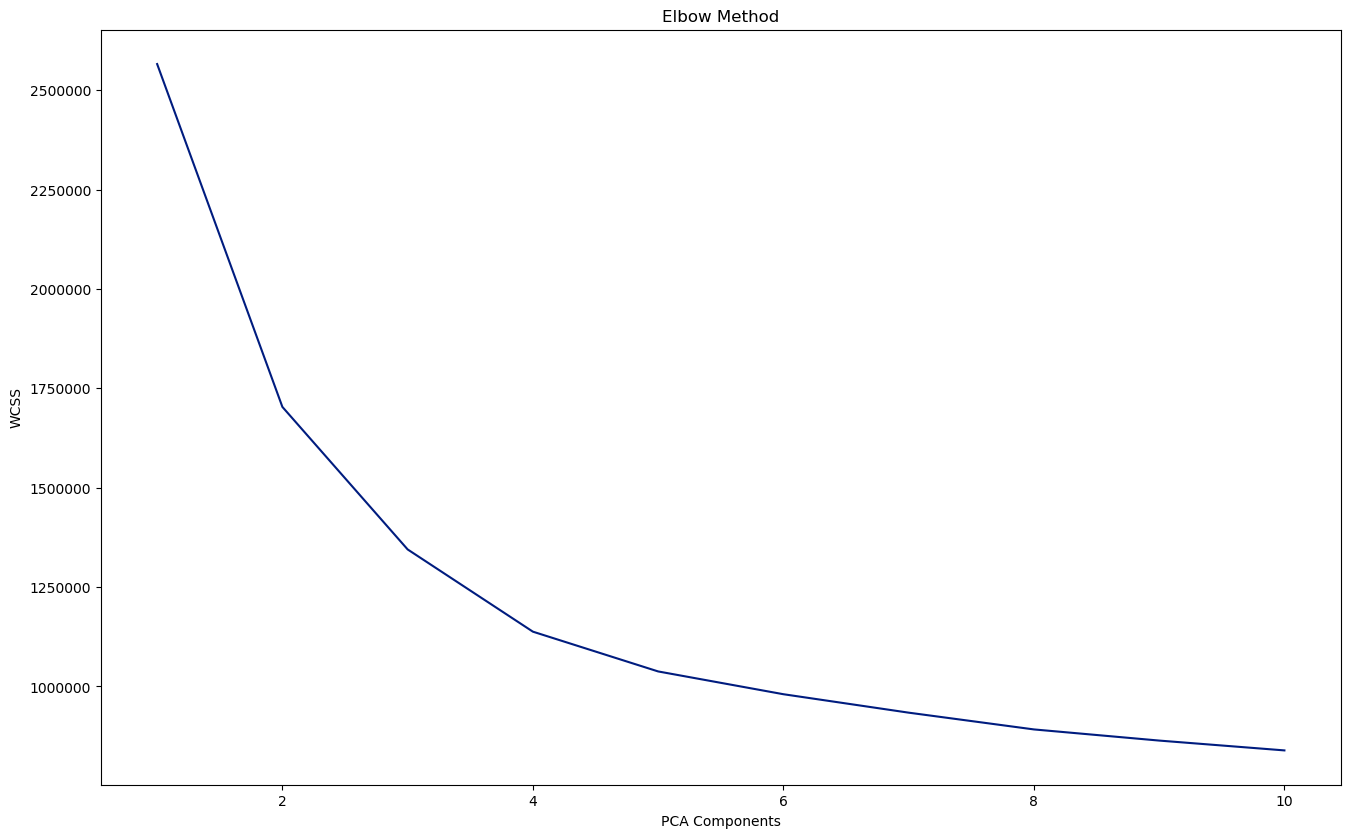

In [49]:
wcss = []
plt.figure(figsize=(16, 10), dpi=100)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('PCA Components')
plt.ylabel('WCSS')
plt.show()

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-9.673541,-3.264636
1,-8.996034,-2.390310
2,-8.799608,-3.958752
3,5.379114,0.150147
4,-8.583742,-3.494537


In [129]:
pca.explained_variance_ratio_

array([0.50318034, 0.16332352])

In [130]:
finalDf = pd.concat([principalDf, df[['player_position']]], axis = 1)
finalDf = finalDf[finalDf.player_position != '0']
#finalDf = finalDf[finalDf['principal component 1'] < 6]

In [131]:
print('pca1 min = ' + str(finalDf['principal component 1'].min()))
print('pca1 max = ' + str(finalDf['principal component 1'].max()))
print('pca2 min = ' + str(finalDf['principal component 2'].min()))
print('pca2 max = ' + str(finalDf['principal component 2'].max()))

pca1 min = -9.673541334462797
pca1 max = 11.761045682988433
pca2 min = -5.511319807617331
pca2 max = 6.563483949953162


In [132]:
finalDf = pd.concat([finalDf, df[['club']]], axis = 1)
finalDf = pd.concat([finalDf, df[['player_position_value']]], axis = 1)
finalDf = pd.concat([finalDf, df[['short_name']]], axis = 1)
finalDf = pd.concat([finalDf, df[['year']]], axis = 1)

In [133]:
finalDf = finalDf.dropna()
finalDf = finalDf.drop_duplicates(subset='short_name', keep="last")
finalDf = finalDf.loc[finalDf['short_name'] != '0']
finalDf

,principal component 1,principal component 2,player_position,club,player_position_value,short_name,year
197,-7.096320,-2.100588,ST,Tottenham Hotspur,6,Lucas Moura,19/20
254,-6.269067,-1.351533,ST,Athletic Club de Bilbao,6,Iñaki Williams,19/20
327,-2.935720,3.905861,CB,Uruguay,2,E. Schetino,19/20
328,-6.867498,-2.094605,CM,Uruguay,4,J. Sildero,19/20
353,-6.197300,-1.934175,ST,Borussia Mönchengladbach,6,A. Plea,19/20
407,-3.745242,3.371885,CB,Uruguay,2,J. Frendado,19/20
408,-5.148414,-4.140719,CM,Uruguay,4,S. Ardero,19/20
409,-4.270588,-1.647878,ST,Uruguay,6,L. Dálves,19/20
410,-3.521439,-1.865903,ST,Ecuador,6,S. Mandíquez,19/20
417,-4.528673,3.388955,CB,Atlético Madrid,2,Mario Hermoso,19/20


In [134]:
finalDf.head()

,principal component 1,principal component 2,player_position,club,player_position_value,short_name,year
197,-7.096320,-2.100588,ST,Tottenham Hotspur,6,Lucas Moura,19/20
254,-6.269067,-1.351533,ST,Athletic Club de Bilbao,6,Iñaki Williams,19/20
327,-2.935720,3.905861,CB,Uruguay,2,E. Schetino,19/20
328,-6.867498,-2.094605,CM,Uruguay,4,J. Sildero,19/20
353,-6.197300,-1.934175,ST,Borussia Mönchengladbach,6,A. Plea,19/20


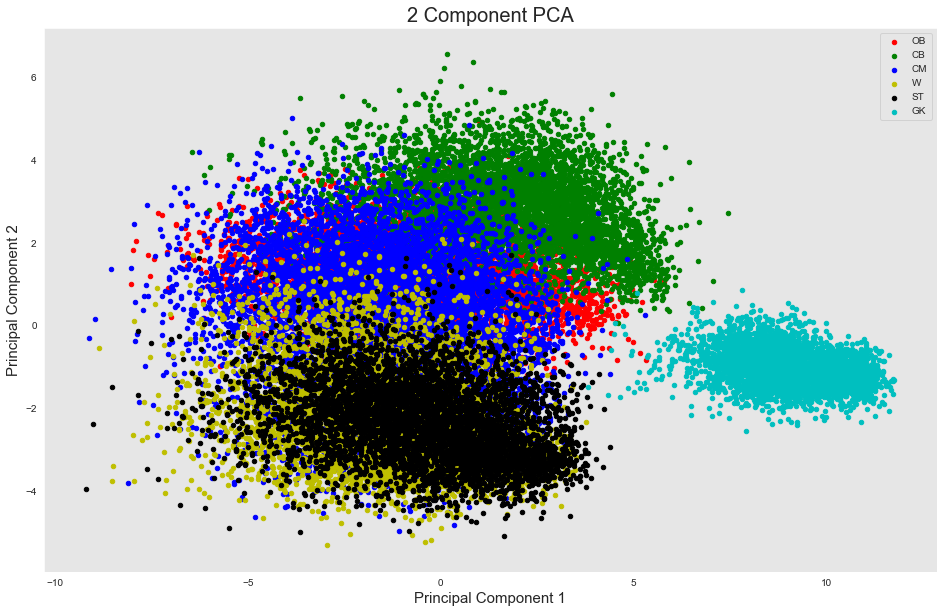

In [135]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['OB', 'CB', 'CM', 'W', 'ST', 'GK']
colors = ['r', 'g', 'b', 'y','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['player_position'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

In [136]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

#kmeans = KMeans(n_clusters=7)

clusters = km.fit(principalDf)
y_km = km.fit_predict(principalDf)

In [137]:
finalDf['cluster'] = pd.Series(clusters.labels_, index=None)
finalDf.head()

,principal component 1,principal component 2,player_position,club,player_position_value,short_name,year,cluster
197,-7.096320,-2.100588,ST,Tottenham Hotspur,6,Lucas Moura,19/20,2
254,-6.269067,-1.351533,ST,Athletic Club de Bilbao,6,Iñaki Williams,19/20,2
327,-2.935720,3.905861,CB,Uruguay,2,E. Schetino,19/20,5
328,-6.867498,-2.094605,CM,Uruguay,4,J. Sildero,19/20,2
353,-6.197300,-1.934175,ST,Borussia Mönchengladbach,6,A. Plea,19/20,2


In [138]:
finalDf['cluster'].value_counts()

4    7436
1    6541
3    5364
2    5108
0    3579
5    3556
Name: cluster, dtype: int64

In [139]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

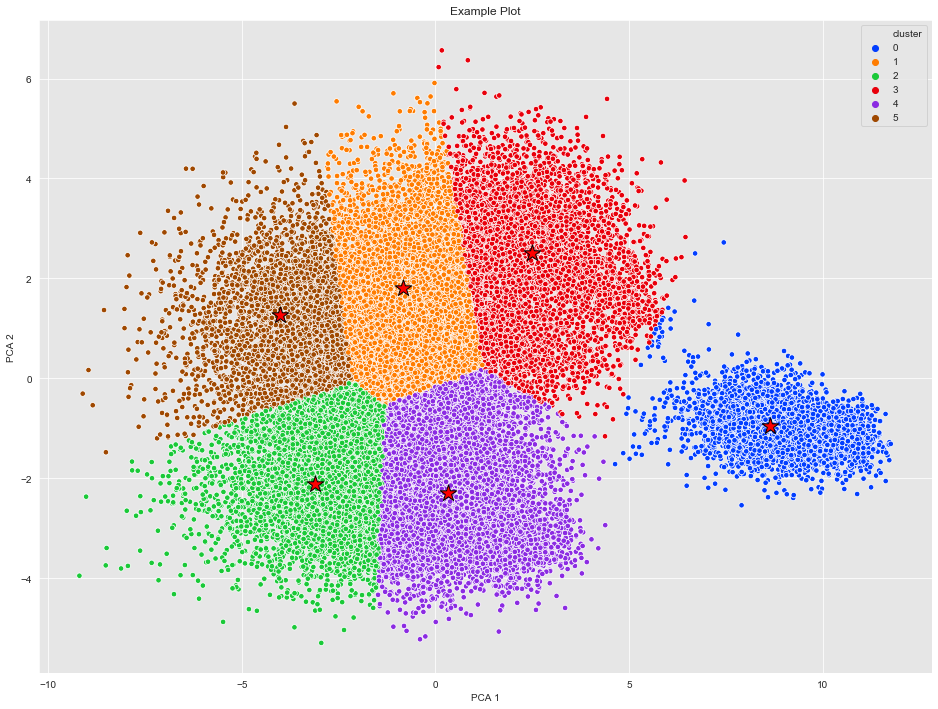

In [140]:
palette = sns.color_palette("bright", 6)  #Choosing color
plt.figure(figsize=(16, 12))

g = sns.scatterplot(x="principal component 1", y="principal component 2", palette=palette, hue = 'cluster', s=30, data=finalDf)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title('Example Plot')
# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

plt.show()

In [141]:
label = finalDf['cluster']

In [142]:
features=list(zip(finalDf['principal component 1'],finalDf['principal component 2']))

In [143]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[2,0]]) #GK input (should output [1])
print(predicted)

[3]


In [144]:
df_player_selection = finalDf.loc[finalDf['short_name'] == 'A. Lacazette']
df_player_selection

,principal component 1,principal component 2,player_position,club,player_position_value,short_name,year,cluster
67890,-6.696997,-2.186092,ST,Arsenal,6,A. Lacazette,18/19,2


In [145]:
df_player_pca = df_player_selection[['principal component 1', 'principal component 2']].to_numpy()
df_player_pca

array([[-6.69699707, -2.18609202]])

In [146]:
predicted= model.predict(df_player_pca)
print(predicted)

[2]


In [147]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['principal component 1', 'principal component 2']])

In [148]:
#Using KDTree to find 3 articles similar to that of Ederson

dist, idx = kdt.query(finalDf[['principal component 1', 'principal component 2']][finalDf['short_name']=='A. Lacazette'], k=5)

In [151]:
print(finalDf['short_name'].iloc[idx[0,1]])
print(finalDf['short_name'].iloc[idx[0,2]])
print(finalDf['short_name'].iloc[idx[0,3]])
print(finalDf['short_name'].iloc[idx[0,4]])

Willian
E. Lavezzi
M. Rashford
José Callejón


In [152]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['principal component 1', 'principal component 2']])

#Using KDTree to find 5 articles similar to that of input

dist, idx = kdt.query(finalDf[['principal component 1', 'principal component 2']][finalDf['short_name']=='A. Lacazette'], k=5)

nn_df = pd.DataFrame()

nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,1]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,2]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,3]])
nn_df = nn_df.append(finalDf[['short_name', 'club', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,4]])
nn_df['cluster'] = nn_df['cluster'].astype(str)
nn_df['cluster'] = nn_df['cluster'].str.split('.').str[0]
nn_df

,club,cluster,player_position,principal component 1,principal component 2,short_name
67907,Chelsea,2,W,-6.687473,-2.190445,Willian
68402,Hebei China Fortune FC,2,ST,-6.678044,-2.194193,E. Lavezzi
68078,Manchester United,2,W,-6.692821,-2.225817,M. Rashford
67910,Napoli,2,W,-6.614694,-2.202140,José Callejón


In [153]:
nn_mean = nn_df[['principal component 1', 'principal component 2']].mean()
print(nn_mean[0])
print(nn_mean[1])

-6.668257882992292
-2.2031486799249747


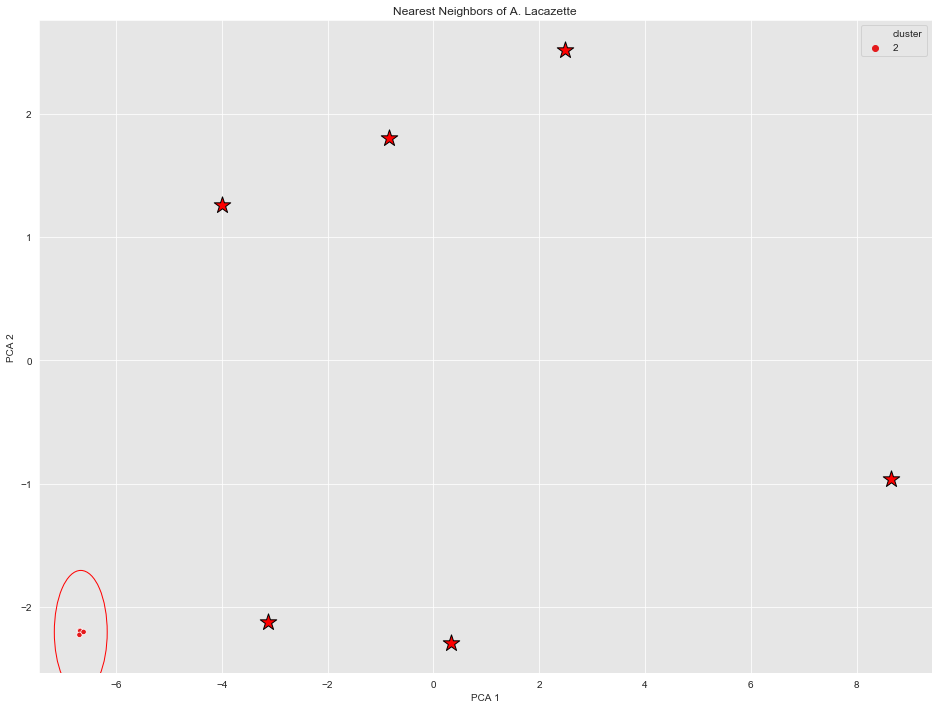

In [154]:
palette = sns.color_palette("Set1", 1)  #Choosing color
plt.figure(figsize=(16, 12))

circle1 = plt.Circle((nn_mean[0], nn_mean[1]), 0.5, color='r', fill=False)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", palette=palette, hue = 'cluster', s=30, data=nn_df)
ax.add_artist(circle1)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)


plt.title('Nearest Neighbors of ' + finalDf['short_name'].iloc[idx[0,0]])

# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

#plt.xlim(-7, 6)
#plt.ylim(-4, 4)
plt.show()